In [117]:
%run init.py # notebook initialization
%run retrieve-data.ipynb # donwload and format DPC Covid data
ita = pd.read_pickle('dataframes/mydata_dpc_ita.p') # national and regional dataframes
prov = pd.read_pickle('dataframes/mydata_dpc_ita_province.p') # province dataframe

ita['date'] = ita['date'] - timedelta(hours=17)
prov['date'] = prov['date'] - timedelta(hours=17)

lastday = ita.date.iat[-1]
print('Dati regionali aggiornati a:', lastday)
print('Dati provinciali aggiornati a:', prov.date.iat[-1])

lockdown_date = pd.Timestamp(datetime.datetime(2020,3,11))
phase2_date = pd.Timestamp(datetime.datetime(2020,5,4))
bmk_p2 = ita[ita.date==phase2_date]

# WEEKLY DATA!!!
ita_weekly = ita.groupby(['region','weekid'],as_index=False).sum()
ita_weekly['date'] = ita_weekly['weekid'].map(lambda weekid: datetime.datetime.strptime('%04d-%02d-1' % (int(weekid/100), weekid-int(weekid/100)*100), '%G-%V-%w').date()+timedelta(days=6))

prov_weekly = prov.groupby(['provincia','weekid'],as_index=False).sum()
prov_weekly['date'] = prov_weekly['weekid'].map(lambda weekid: datetime.datetime.strptime('%04d-%02d-1' % (int(weekid/100), weekid-int(weekid/100)*100), '%G-%V-%w').date()+timedelta(days=6))


#############################################
# Useful functions
#############################################
def sorted_set(regions, var):
    '''Ordina set rispetto alla variabile var'''
    df = data[data.region.isin(regions)][data.date==lastday].sort_values(var, ascending=False)
    sortedset = df.region.unique()
    return sortedset

def leglabels_style():
    '''Make legend labels colored'''
    leg._legend_box.align = "left"
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())
        
def format_dateaxis():
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
def sorted_set_prov(df, province, var):
    '''Ordina set rispetto alla variabile var'''
    df = df[df.provincia.isin(province)][df.date==lastday].sort_values(var, ascending=False)
    sortedset = df.provincia.unique()
    return sortedset

Current time: 2020-08-23 23:32:39.748391


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Dati regionali aggiornati a: 2020-08-23 00:00:00
Dati provinciali aggiornati a: 2020-08-23 00:00:00


In [118]:
summary = ita[ita.date==lastday].sort_values('new_cases', ascending=False)
summary = summary[['region','cases','new_cases','deaths','new_deaths','terapia_intensiva','cases_per100k','deaths_per100k']]
summary['cases_per100k'] = summary['cases_per100k'].map('{:.1f}'.format)
summary['deaths_per100k'] = summary['deaths_per100k'].map('{:.1f}'.format)
summary.head(30)

,region,cases,new_cases,deaths,new_deaths,terapia_intensiva,cases_per100k,deaths_per100k
181,Italia,259345,1209,35437,7,69,428.7,58.6
545,Nord,206932,621,30321,5,36,745.5,109.2
727,Sud,18383,300,1541,1,17,96.5,8.1
363,Centro,34030,288,3575,1,16,248.7,26.1
2365,Lombardia,98316,239,16856,4,14,979.2,167.9
2001,Lazio,9947,184,874,1,6,168.6,14.8
4549,Veneto,21955,145,2104,0,4,447.1,42.9
1455,Campania,5722,138,441,1,2,98.1,7.6
1637,Emilia-Romagna,30915,127,4456,1,8,694.7,100.1
3639,Sardegna,1734,81,134,0,0,105.1,8.1


In [119]:
summary = prov[prov.date==lastday].sort_values('new_cases', ascending=False)
summary = summary[['provincia','region','new_cases','cases']]
summary['new_cases'] = summary['new_cases'].map('{:.0f}'.format)
summary = summary.reset_index(drop=True)
summary.head(30)

,provincia,region,new_cases,cases
0,Fuori Regione / Provincia Autonoma,Toscana,507,507
1,Fuori Regione / Provincia Autonoma,Emilia-Romagna,460,462
2,Fuori Regione / Provincia Autonoma,Lombardia,411,677
3,Fuori Regione / Provincia Autonoma,Veneto,345,349
4,Fuori Regione / Provincia Autonoma,Piemonte,277,277
5,Roma,Lazio,140,7378
6,Fuori Regione / Provincia Autonoma,Liguria,139,266
7,Fuori Regione / Provincia Autonoma,Lazio,120,127
8,Milano,Lombardia,89,25558
9,Napoli,Campania,69,3175


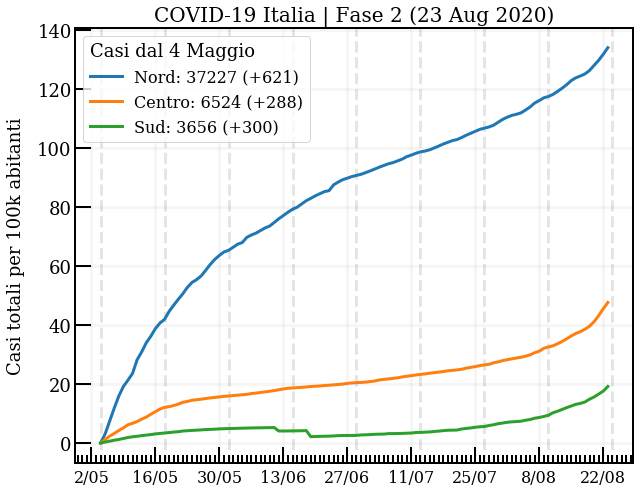

In [120]:
regions = ['Nord', 'Centro', 'Sud']
colors = ['tab:blue', "tab:orange","tab:green"]
var = 'cases_per100k'

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

regions = ['Nord', 'Centro', 'Sud']
colors = ['tab:blue', "tab:orange","tab:green"]
N = len(regions)

data = ita[ita.date>=phase2_date]

for i,reg in enumerate(regions):
    df = data[data.region==reg]
    values = df[var]-df[var].iat[0]
    tot = (df['cases']-df['cases'].iat[0]).iat[-1]
    new = df['new_cases'].iat[-1]
    lb = '%s: %d (+%.f)' % (reg ,tot, new)
    ax.plot(df.date, values, label=lb)
    

ax.autoscale(False)
for d in np.arange(0,1000,14):
    ax.vlines(phase2_date+timedelta(days=int(d)),-1000,10000, color='k', linestyles='--', alpha=0.1)


plt.ylabel('Casi totali per 100k abitanti')
plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
ax.tick_params(axis='x', which='major', labelsize=16)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))
#fig.autofmt_xdate()
#plt.gcf().autofmt_xdate()

#legend
leg = plt.legend(loc='upper left',fontsize=16, title='Casi dal 4 Maggio') 
leg._legend_box.align = "left"

plt.title('COVID-19 Italia | Fase 2 (%s)' % lastday.strftime('%-d %b %Y'), fontsize=20)

plt.show()

    
#cumulative(regions, colors, 'cases_per100k', title='COVID-19 Casi (Totale assoluto)', ylabel='Casi totali')
#cumulative(regions, colors, 'deaths', title='COVID-19 Morti (Totale assoluto)', ylabel='Morti totali')
#cumulative(regions, colors, 'recovered', title='COVID-19 Guariti (Totale assoluto)', ylabel='Guariti totali')
#cumulative(regions, colors, 'tests', title='COVID-19 Tamponi (Totale assoluto)', ylabel='Tamponi totali')

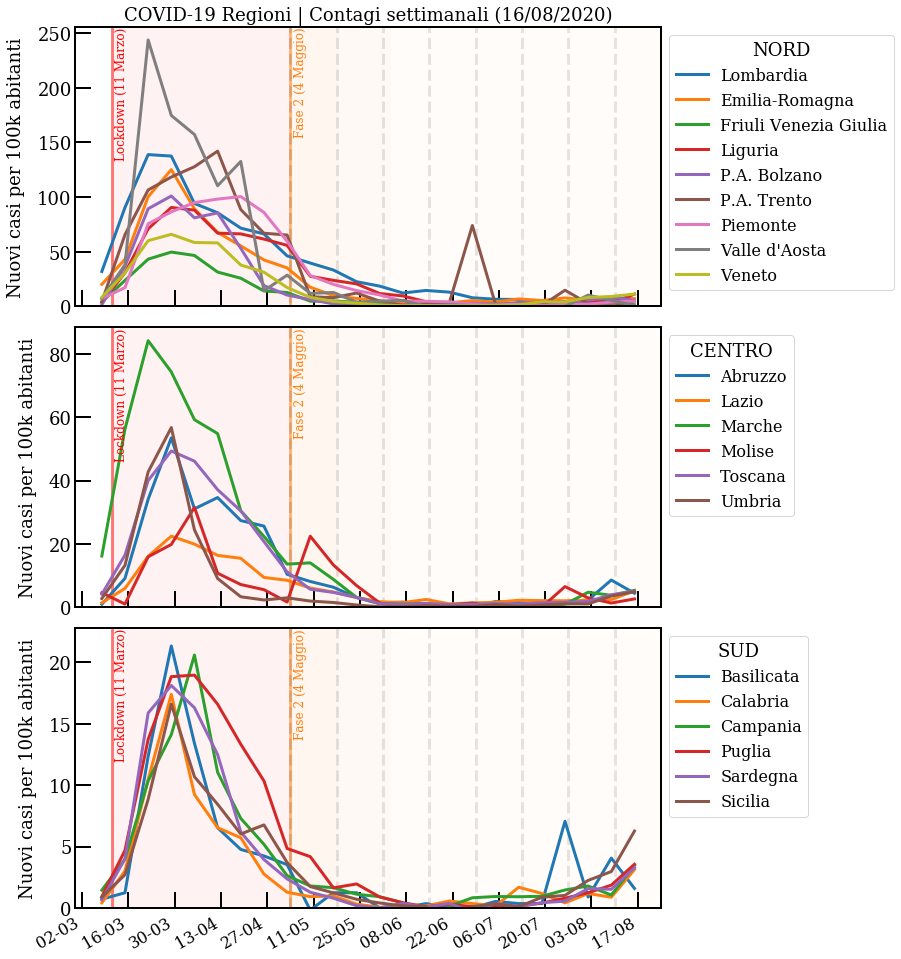

In [121]:
# figure
fig = plt.figure(figsize=(14,18))
grid = plt.GridSpec(3, 4, hspace=0.075, wspace=0)
ax = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax)
ax3 = fig.add_subplot(grid[2:, 1:], sharex=ax)
ax.tick_params(labelbottom=False) 
ax2.tick_params(labelbottom=False) 


   
for reg in nord:
    df=ita_weekly[ita_weekly.region==reg]
    ax.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label=reg)
    ax.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='NORD')
    
for reg in centro:
    df=ita_weekly[ita_weekly.region==reg]
    ax2.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label=reg)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='CENTRO')
    
for reg in sud:
    df=ita_weekly[ita_weekly.region==reg]
    ax3.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label=reg)
    ax3.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='SUD')

for axx in [ax,ax2,ax3]:
    axx.autoscale(False) 
    axx.vlines(datetime.date(2020,3,11),-1000,10000, color='r', linestyles='-', alpha=0.5)
    axx.vlines(datetime.date(2020,5,4),-1000,10000, color='tab:orange', linestyles='-', alpha=0.5)
    axx.axvspan(datetime.date(2020,3,11),datetime.date(2020,5,4),-1000,10000, color='r', alpha=0.05)
    axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,5,18),-1000,10000, color='tab:orange', alpha=0.02)
    axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,6,3),-1000,10000, color='tab:orange', alpha=0.02)
    axx.axvspan(datetime.date(2020,5,4),datetime.date(2021,5,4),-1000,10000, color='tab:orange', alpha=0.02)
    axx.text(datetime.date(2020,3,12), axx.get_ylim()[1], 'Lockdown (11 Marzo)', va='top', ha='left', rotation=90, fontsize=12, color='r')
    axx.text(datetime.date(2020,5,5), axx.get_ylim()[1], 'Fase 2 (4 Maggio)', va='top', ha='left', rotation=90, fontsize=12, color='tab:orange')
    axx.set_ylabel('Nuovi casi per 100k abitanti')
    axx.set_ylim(bottom=0)
    for d in np.arange(0,1000,14):
        axx.vlines(phase2_date+timedelta(days=int(d)),-1000,10000, color='k', linestyles='--', alpha=0.1)


ax3.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.tick_params(axis='x', which='major', labelsize=14)
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()

ax.set_title('COVID-19 Regioni | Contagi settimanali (%s)' % df.date.iat[-2].strftime('%-d/%m/%Y'))

plt.show()

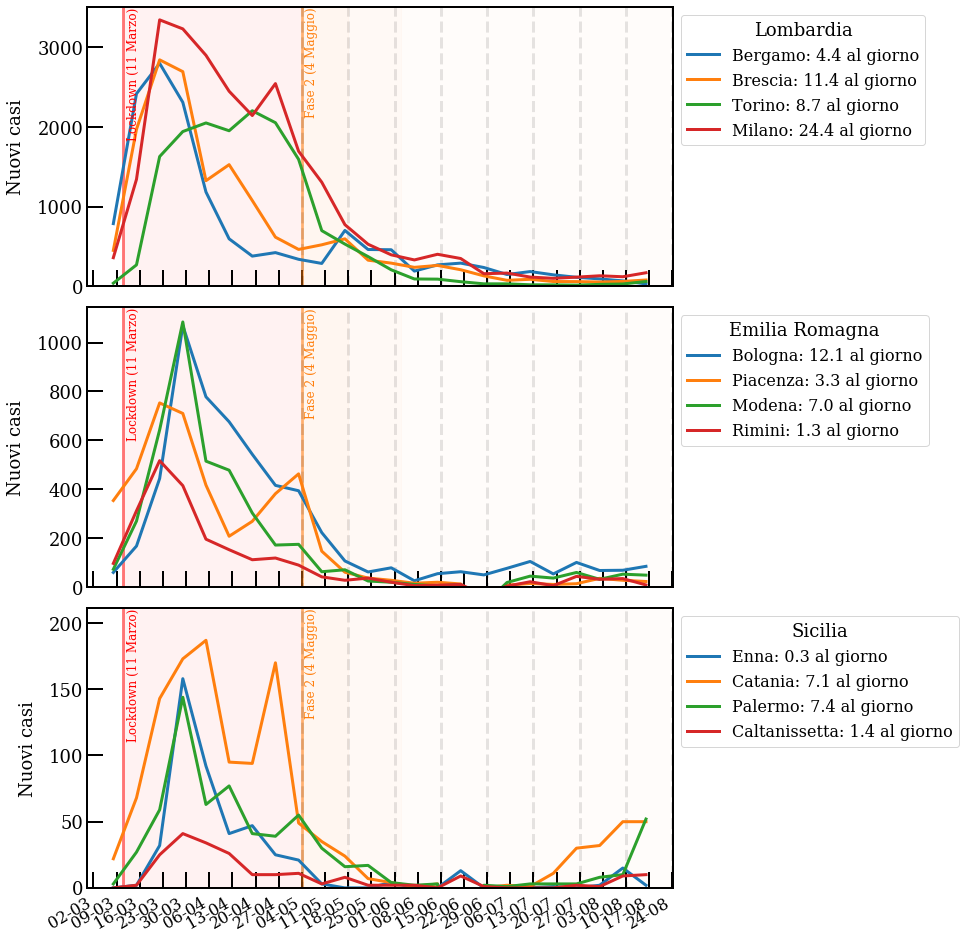

In [122]:
# figure
fig = plt.figure(figsize=(14,18))
grid = plt.GridSpec(3, 4, hspace=0.075, wspace=0)
ax = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax)
ax3 = fig.add_subplot(grid[2:, 1:], sharex=ax)
ax.tick_params(labelbottom=False) 
ax2.tick_params(labelbottom=False) 


   
df=prov_weekly[prov_weekly.provincia=='Bergamo']
ax.plot(df.date[1:-1],df.new_cases[1:-1], label='Bergamo'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Brescia']
ax.plot(df.date[1:-1],df.new_cases[1:-1], label='Brescia'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Torino']
ax.plot(df.date[1:-1],df.new_cases[1:-1], label='Torino'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Milano']
ax.plot(df.date[1:-1],df.new_cases[1:-1], label='Milano'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
#ax.set_yscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='Lombardia')

df=prov_weekly[prov_weekly.provincia=='Bologna']
ax2.plot(df.date[1:-1],df.new_cases[1:-1], label='Bologna'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Piacenza']
ax2.plot(df.date[1:-1],df.new_cases[1:-1], label='Piacenza'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Modena']
ax2.plot(df.date[1:-1],df.new_cases[1:-1], label='Modena'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Rimini']
ax2.plot(df.date[1:-1],df.new_cases[1:-1], label='Rimini'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
#ax2.set_yscale('log')
ax2.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='Emilia Romagna')

df=prov_weekly[prov_weekly.provincia=='Enna']
ax3.plot(df.date[1:-1],df.new_cases[1:-1], label='Enna'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Catania']
ax3.plot(df.date[1:-1],df.new_cases[1:-1], label='Catania'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Palermo']
ax3.plot(df.date[1:-1],df.new_cases[1:-1], label='Palermo'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
df=prov_weekly[prov_weekly.provincia=='Caltanissetta']
ax3.plot(df.date[1:-1],df.new_cases[1:-1], label='Caltanissetta'+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
#ax3.set_yscale('log')
ax3.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='Sicilia')


for axx in [ax,ax2,ax3]:
    axx.autoscale(False) 
    axx.vlines(datetime.date(2020,3,11),-1000,10000, color='r', linestyles='-', alpha=0.5)
    axx.vlines(datetime.date(2020,5,4),-1000,10000, color='tab:orange', linestyles='-', alpha=0.5)
    axx.axvspan(datetime.date(2020,3,11),datetime.date(2020,5,4),-1000,10000, color='r', alpha=0.05)
    axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,5,18),-1000,10000, color='tab:orange', alpha=0.02)
    axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,6,3),-1000,10000, color='tab:orange', alpha=0.02)
    axx.axvspan(datetime.date(2020,5,4),datetime.date(2021,5,4),-1000,10000, color='tab:orange', alpha=0.02)
    axx.text(datetime.date(2020,3,12), axx.get_ylim()[1], 'Lockdown (11 Marzo)', va='top', ha='left', rotation=90, fontsize=12, color='r')
    axx.text(datetime.date(2020,5,5), axx.get_ylim()[1], 'Fase 2 (4 Maggio)', va='top', ha='left', rotation=90, fontsize=12, color='tab:orange')
    axx.set_ylabel('Nuovi casi')
    axx.set_ylim(bottom=0)
    for d in np.arange(0,1000,14):
        axx.vlines(phase2_date+timedelta(days=int(d)),-1000,10000, color='k', linestyles='--', alpha=0.1)


ax3.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.tick_params(axis='x', which='major', labelsize=14)
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()

#ax.set_title('COVID-19 Province | Contagi settimanali (%s)' % df.date.iat[-2].strftime('%-d/%m/%Y'))

plt.show()

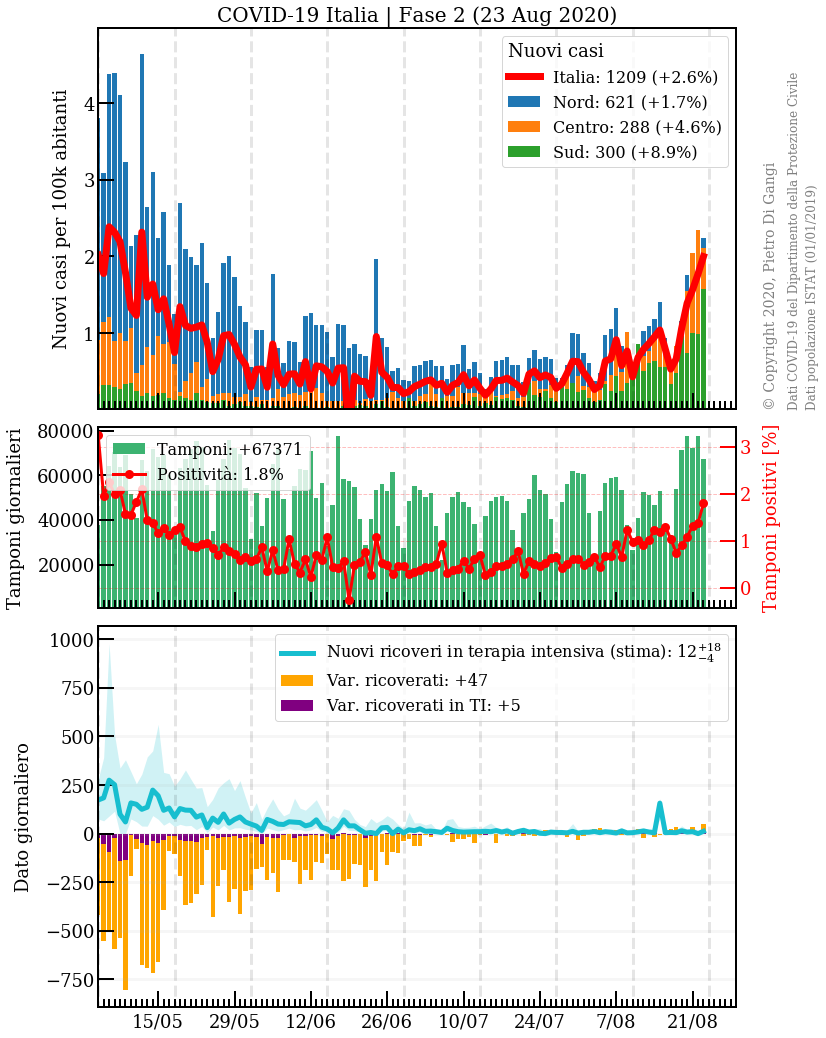

In [123]:
regions = ['Nord', 'Centro', 'Sud','Italia']
var = 'new_cases'
cumvar = var.replace("new_", "")
title = 'COVID-19 Italia | Fase 2 (%s)' % lastday.strftime('%-d %b %Y') 
ylabel = 'Nuovi casi per 100k abitanti'

    

# figure
fig = plt.figure(figsize=(18,18))
grid = plt.GridSpec(5, 3, hspace=0.1, wspace=0.35)
ax = fig.add_subplot(grid[:-3, 1:])
#y_ax = fig.add_subplot(grid[:-1, 0])#, xticks=[])#, sharey=ax)
x_ax = fig.add_subplot(grid[-3, 1:], sharex=ax)
x_ax2 = fig.add_subplot(grid[-2:, 1:], sharex=ax)
#x_ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(left=False, labelleft=False, right=True, labelright=True) 
ax.tick_params(labelbottom=False) 
x_ax.tick_params(labelbottom=False) 

data = ita[ita.date>=phase2_date]

# main panel plot data
for i,reg in enumerate(regions):
    df = data[data.region==reg]
    pop = df['population'].iat[0]        
    tot = df[var].iat[-1]
    cumtot = df[cumvar].iat[-2] - df[cumvar].iat[0]
    lb = '%s: %.f (+%.1f%s)' % (reg, tot, tot/cumtot*100, '%')
    if reg=='Italia':
        ax.plot(df.date, df[var]/pop*1e5, label=lb, color='r', lw=7, ls='-')
    else:
        ax.bar(df.date, df[var]/pop*1e5, label=lb)
        
ax.set_ylabel(ylabel)
#ax.yaxis.set_label_position("right")

leg = ax.legend(loc=0, title='Nuovi casi') 
leg._legend_box.align = "left"


# bottom panel
ax2 = x_ax.twinx()
ax2.set_ylabel('Tamponi positivi [%]', color='r')
ax2.tick_params(colors='r')
#ax2.set_yticks(np.arange(0,55,1))
#ax2.set_ylim(0)
ax2.grid(axis='y', linewidth=1, alpha=0.25, color='r', ls='--', which='both')
x_ax.set_ylabel('Tamponi giornalieri')
var = 'new_tests'
cumvar = var.replace("new_", "")
tot = df[var].iat[-1]
lb1 = 'Tamponi: +%d' % (df[var].iat[-1])
b1 = x_ax.bar(df.date, df[var], label=lb1, color='mediumseagreen')

lb3 = 'Positività: %.1f%s' % (df['new_cases'].iat[-1]/df['new_tests'].iat[-1]*100, '%')
l, = ax2.plot(df.date, df['new_cases']/df['new_tests']*100, label=lb3, color='r', marker='.', lw=3)

handles = [b1, l]
labels = [lb1, lb3]
ax2.legend(handles, labels, loc='upper left')
x_ax.set_ylim(500)

# left panel
x_ax2.grid(axis='y', linewidth=3, alpha=0.1, which='major')

x_ax2.plot(df.date, df.new_terapia_intensiva_netta, color='tab:cyan', lw=5, 
           label='Nuovi ricoveri in terapia intensiva (stima): %d$^{+%.0f}_{-%.0f}$' % (df.new_terapia_intensiva_netta.iat[-1],
                                                                                        df.new_terapia_intensiva_netta_max.iat[-1] - df.new_terapia_intensiva_netta.iat[-1],
                                                                                        df.new_terapia_intensiva_netta.iat[-1] - df.new_terapia_intensiva_netta_min.iat[-1],
                                                                                       ))
x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta_max, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan')
x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta_min, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan')

if df.new_ricoverati_con_sintomi.iat[-1]<0: sign=''
else: sign='+'
x_ax2.bar(df.date, df.new_ricoverati_con_sintomi, color='orange', label='Var. ricoverati: %s%d' % (sign,df.new_ricoverati_con_sintomi.iat[-1]))

if df.new_terapia_intensiva.iat[-1]<0: sign=''
else: sign='+'
x_ax2.bar(df.date, df.new_terapia_intensiva, color='purple', label='Var. ricoverati in TI: %s%d' % (sign,df.new_terapia_intensiva.iat[-1]))


x_ax2.legend(loc=0)

x_ax2.set_ylabel('Dato giornaliero')

for axx in [ax,x_ax,x_ax2]:
    axx.autoscale(False)
    for d in np.arange(0,1000,14):
        axx.vlines(phase2_date+timedelta(days=int(d)),-1000,100000, color='k', linestyles='--', alpha=0.1)


# axes settings
ax.set_xlim(left = phase2_date)
ax.set_ylim(bottom = 0.01)
#plt.ylabel(ylabel)
#plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
#plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
ax.tick_params(axis='x', which='major', labelsize=12)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))

#legend

ax.set_title(title , fontsize=20)

# disclaimer
dayspan = df.date.iat[-1] - phase2_date
text = '© Copyright 2020, Pietro Di Gangi'
ax.text(lastday+0.10*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
ax.text(lastday+0.14*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
text = 'Dati popolazione ISTAT (01/01/2019)'
ax.text(lastday+0.17*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

plt.show()



In [124]:
def overview(regions):
    var = 'new_cases'
    cumvar = var.replace("new_", "")
    title = 'COVID-19 ' +regions[0]+ ' | Fase 2 (%s)' % lastday.strftime('%-d %b %Y') 
    ylabel = 'Nuovi casi per 100k abitanti'



    # figure
    fig = plt.figure(figsize=(18,18))
    grid = plt.GridSpec(5, 3, hspace=0.1, wspace=0.35)
    ax = fig.add_subplot(grid[:-3, 1:])
    #y_ax = fig.add_subplot(grid[:-1, 0])#, xticks=[])#, sharey=ax)
    x_ax = fig.add_subplot(grid[-3, 1:], sharex=ax)
    x_ax2 = fig.add_subplot(grid[-2, 1:], sharex=ax)
    x_ax3 = fig.add_subplot(grid[-1, 1:], sharex=ax)
    #x_ax.tick_params(axis='y', which='major', labelsize=14)
    ax.tick_params(labelbottom=False) 
    x_ax.tick_params(labelbottom=False) 
    x_ax2.tick_params(labelbottom=False) 

    data = ita[ita.date>=phase2_date]

    # main panel plot data
    for i,reg in enumerate(regions):
        df = data[data.region==reg]
        pop = df['population'].iat[0]        
        tot = df[var].iat[-1]
        cumtot = df[cumvar].iat[-2] - df[cumvar].iat[0]
        lb = '%s: %.f (+%.1f%s)' % (reg, tot, tot/cumtot*100, '%')
        if reg=='Italia':
            ax.plot(df.date, df[var]/pop*1e5, label=lb, color='r', lw=3, ls='--')
        else:
            ax.bar(df.date, df[var]/pop*1e5, label=lb, color='tab:blue')

    ax.set_ylabel(ylabel)
    ax.set_ylim(bottom=0)
    #ax.yaxis.set_label_position("right")

    leg = ax.legend(loc=0, title='Nuovi casi') 
    leg._legend_box.align = "left"


    df = data[data.region==regions[0]]
    
    # bottom panel
    ax2 = x_ax.twinx()
    ax2.set_ylabel('Tamponi positivi [%]', color='r')
    ax2.tick_params(colors='r')
    #ax2.set_yticks(np.arange(0,55,1))
    #ax2.set_ylim(0)
    ax2.grid(axis='y', linewidth=1, alpha=0.25, color='r', ls='--', which='both')
    x_ax.set_ylabel('Tamponi')
    var = 'new_tests'
    cumvar = var.replace("new_", "")
    tot = df[var].iat[-1]
    lb1 = 'Tamponi: +%d' % (df[var].iat[-1])
    b1 = x_ax.bar(df.date, df[var], label=lb1, color='mediumseagreen')

    lb3 = 'Positività: %.1f%s' % (df['new_cases'].iat[-1]/df['new_tests'].iat[-1]*100, '%')
    l, = ax2.plot(df.date, df['new_cases']/df['new_tests']*100, label=lb3, color='r', marker='.', lw=3)

    handles = [b1, l]
    labels = [lb1, lb3]
    ax2.legend(handles, labels, loc='upper left')
    ax2.set_ylim(bottom=0)
    #x_ax.set_ylim(500)

    
    
    # bottom panel 2
    x_ax2.grid(axis='y', linewidth=3, alpha=0.1, which='major')
    
    x_ax2.plot(df.date, df.new_terapia_intensiva_netta, color='tab:cyan', lw=5, label='Nuovi ricoveri in terapia intensiva (stima): +%d' % df.new_terapia_intensiva_netta.iat[-1])
    x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta_max, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)
    x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta_min, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)
    x_ax2.legend(loc=0)
    x_ax2.set_ylabel('Ingressi in\nTerapia Intensiva')
    #x_ax2.set_ylim(bottom=0.5)
    
    
    # bottom panel 3
    x_ax3.grid(axis='y', linewidth=3, alpha=0.1, which='major')

    if df.new_ricoverati_con_sintomi.iat[-1]<0: sign=''
    else: sign='+'
    x_ax3.bar(df.date, df.new_ricoverati_con_sintomi, color='tab:orange', label='Ricoverati: %s%d' % (sign,df.new_ricoverati_con_sintomi.iat[-1]))

    if df.new_terapia_intensiva.iat[-1]<0: sign=''
    else: sign='+'
    x_ax3.bar(df.date, df.new_terapia_intensiva, color='purple', label='Ricoverati in terapia intensiva: %s%d' % (sign,df.new_terapia_intensiva.iat[-1]))
    
    x_ax3.legend(loc=0)
    x_ax3.set_ylabel('Variazione\nRicoverati')

    '''
    for axx in [ax,x_ax,x_ax2,x_ax3]:
        axx.autoscale(False)
        for d in np.arange(0,1000,14):
            axx.vlines(phase2_date+timedelta(days=int(d)),-1000,80000, color='k', linestyles='--', alpha=0.1)
    '''

    # axes settings
    ax.set_xlim(left = phase2_date)
    #ax.set_ylim(bottom = 0.1)
    #plt.ylabel(ylabel)
    #plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
    #plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))

    #legend

    ax.set_title(title , fontsize=20)

    # disclaimer
    dayspan = df.date.iat[-1] - phase2_date
    text = '© Copyright 2020, Pietro Di Gangi'
    ax.text(lastday+0.10*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    ax.text(lastday+0.14*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione ISTAT (01/01/2019)'
    ax.text(lastday+0.17*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()

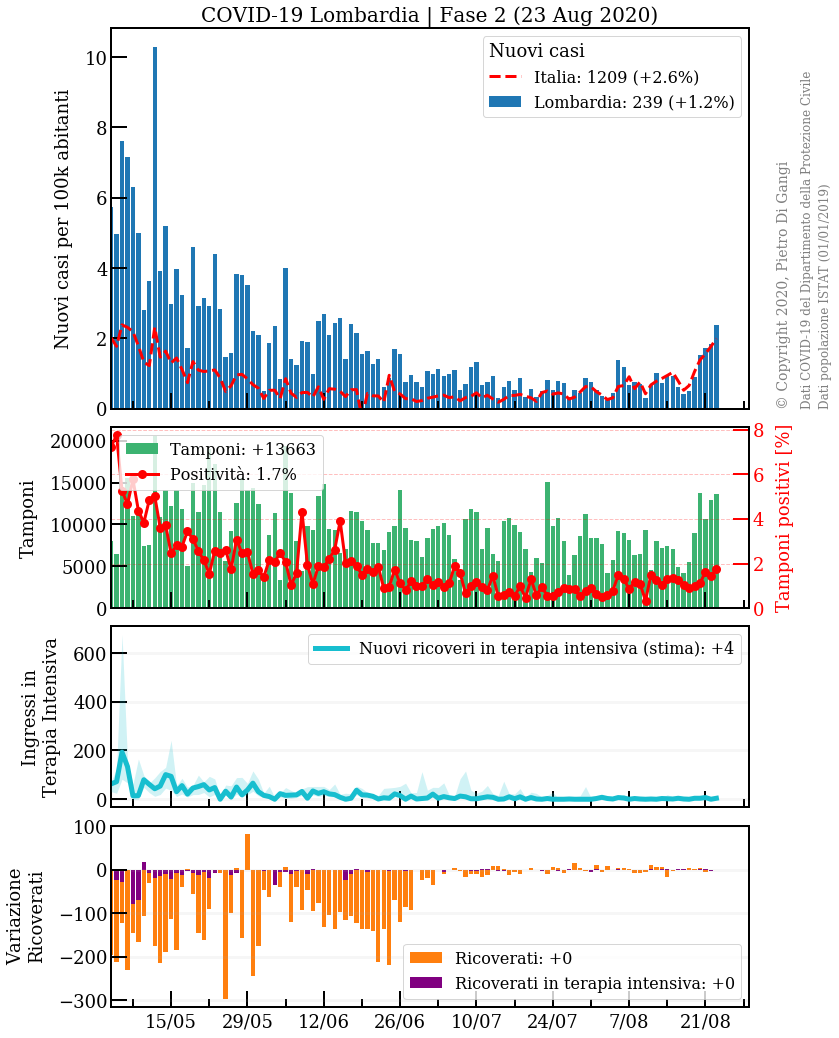

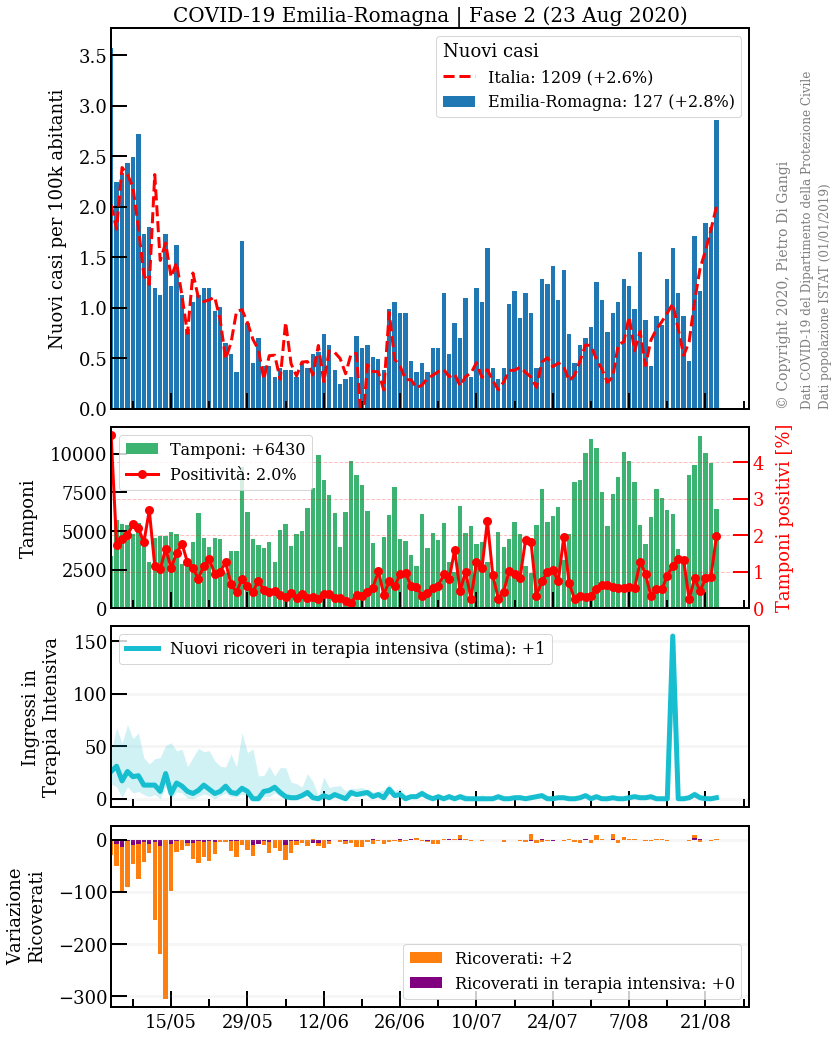

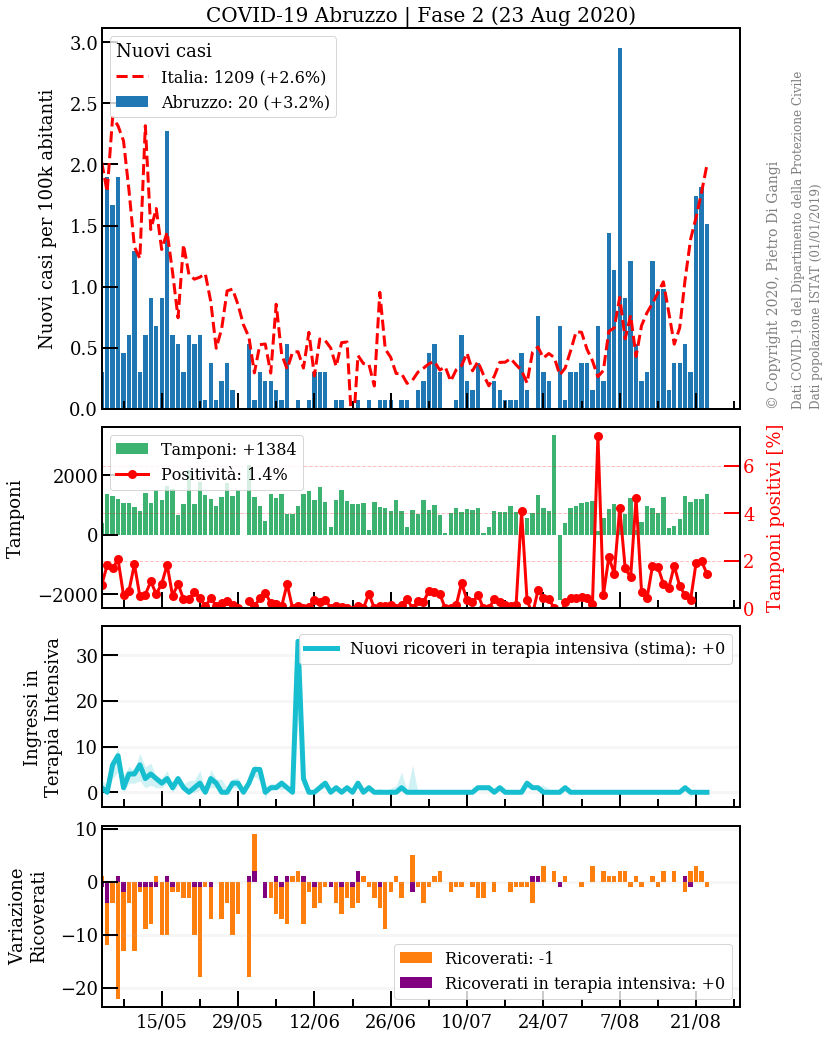

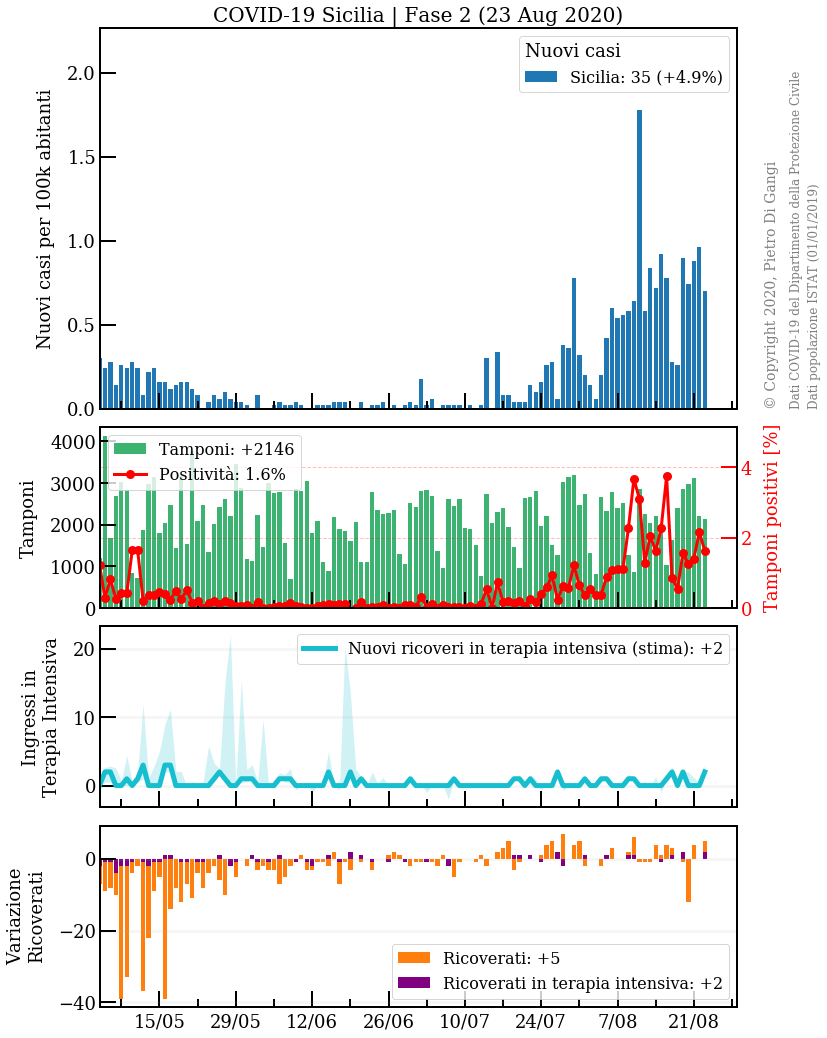

In [125]:
overview(['Lombardia', 'Italia'])
overview(['Emilia-Romagna', 'Italia'])
overview(['Abruzzo', 'Italia'])
overview(['Sicilia'])

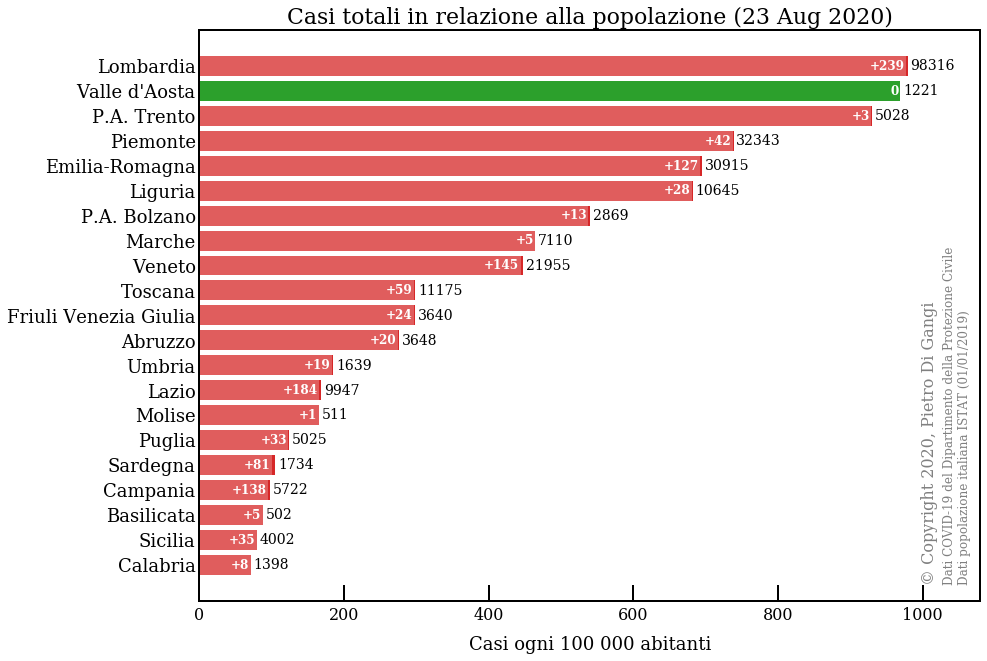

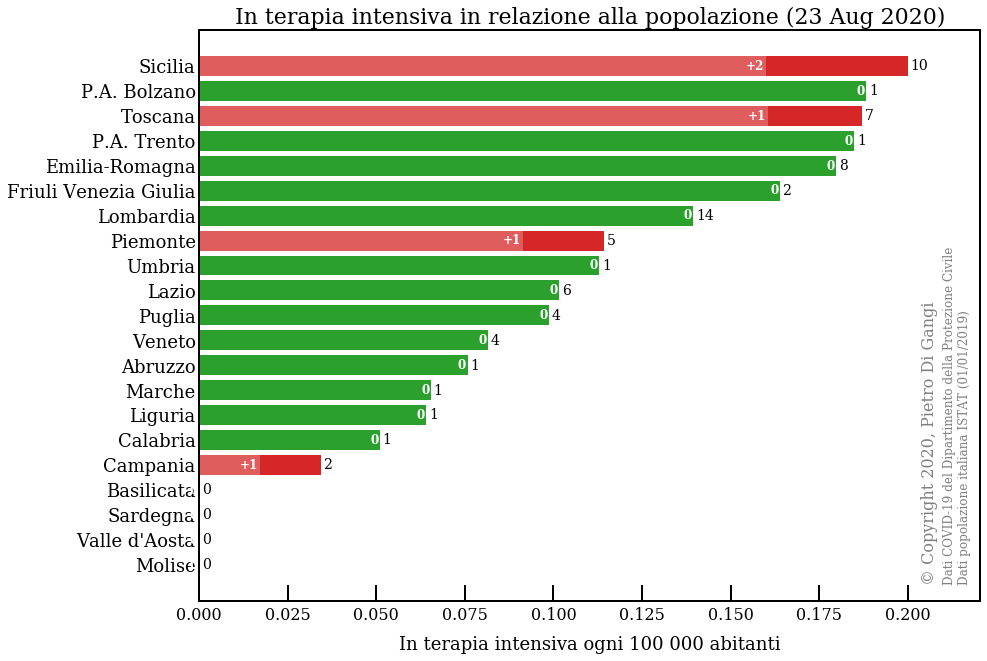

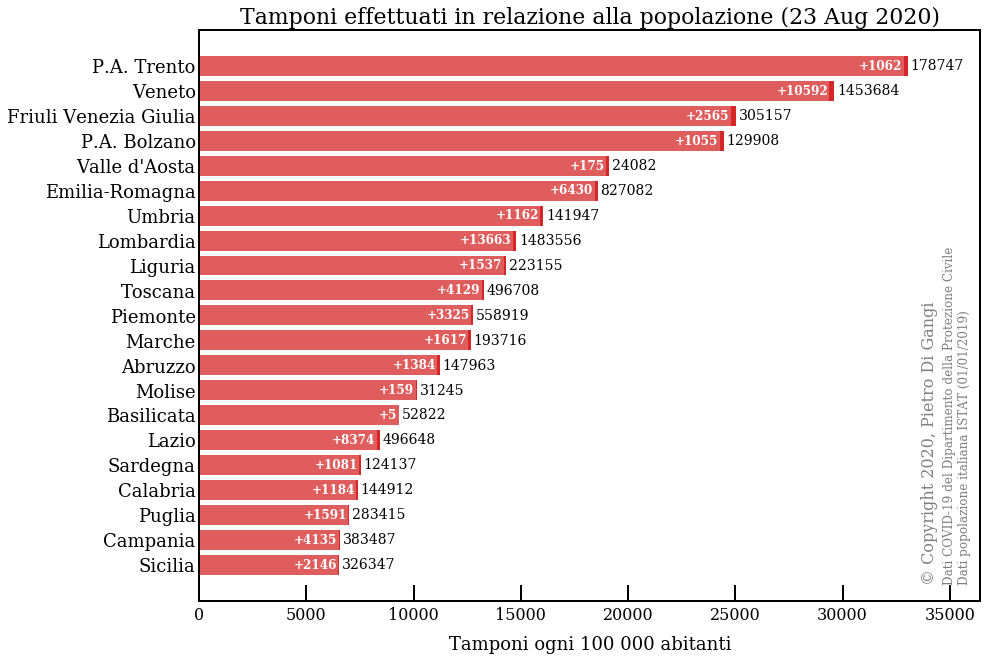

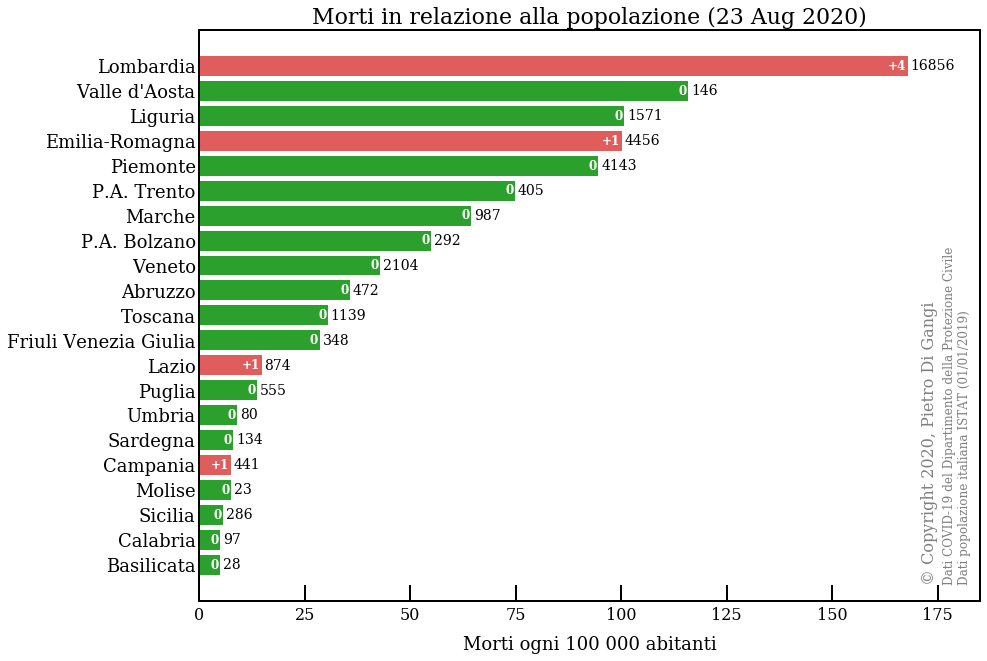

In [126]:
def standing_normalized(states, var, title='', xlabel='x', colors=['tab:red','tab:green']):

    n = len(states)*0.1
    data = ita
    
    fig = plt.figure(figsize=(14,5*n))
    ax = fig.add_subplot(111)
    ax.tick_params(left=False) 
    xmax = data[data.region==states[0]][var+'_per100k'].iat[-1]
    #states = sorted_states(states, var+'_per100k')
    states = states[::-1]
    
    for i,state in enumerate(states):
        df = data[data.region==state]
        pop = data.population.iat[0]
        tot = df[var].iat[-1]
        today = df[var+'_per100k'].iat[-1]
        yesterday = df[var+'_per100k'].iat[-2]
        if today>yesterday:
            ax.barh(state, df[var+'_per100k'].iat[-1], color='tab:red', label='', alpha=1)
            ax.barh(state, df[var+'_per100k'].iat[-2], color='white', label='', alpha=0.25)        
            lb = '%d' % (tot)
            ax.text(df[var+'_per100k'].iat[-1]+2*xmax/500, state, lb, ha='left', va='center', fontsize=14)
            ax.text(df[var+'_per100k'].iat[-2]-1*xmax/500, state, ('+%d' % df['new_'+var].iat[-1]), ha='right', va='center', color='w', fontsize=12, weight='bold')
        else:
            ax.barh(state, df[var+'_per100k'].iat[-2], color='tab:green', label='', alpha=0.25)
            ax.barh(state, df[var+'_per100k'].iat[-1], color='tab:green', label='', alpha=1)
            lb = '%d' % (tot)
            ax.text(df[var+'_per100k'].iat[-1]+2*xmax/500, state, lb, ha='left', va='center', fontsize=14)
            ax.text(df[var+'_per100k'].iat[-1]-1*xmax/500, state, ('%d' % df['new_'+var].iat[-1]), ha='right', va='center', color='w', fontsize=12, weight='bold')
            
    plt.xlabel(xlabel)
    #ax.grid(axis='x', linewidth=2, alpha=0.1, which='major')
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    xmin, xmax = ax.get_xlim() 
    ax.set_xlim(0,xmax*1.05)
    
    #legend
    plt.title(title+' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=22)
    
    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(0.97*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(1.00*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione italiana ISTAT (01/01/2019)'
    plt.text(1.02*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()       

        
states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('cases_per100k', ascending=False).region.unique()
standing_normalized(states, 'cases', 'Casi totali in relazione alla popolazione', 'Casi ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('terapia_intensiva_per100k', ascending=False).region.unique()
standing_normalized(states, 'terapia_intensiva', 'In terapia intensiva in relazione alla popolazione', 'In terapia intensiva ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('tests_per100k', ascending=False).region.unique()
standing_normalized(states, 'tests', 'Tamponi effettuati in relazione alla popolazione', 'Tamponi ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('deaths_per100k', ascending=False).region.unique()
standing_normalized(states, 'deaths', 'Morti in relazione alla popolazione', 'Morti ogni 100 000 abitanti')